<a href="https://colab.research.google.com/github/haruhiysd/QM-Group-Project/blob/main/Panel_regression_NO_COVID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving merged_df_3.csv to merged_df_3.csv


In [13]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly
import plotly.express as px
import warnings
from statsmodels.formula.api import ols
from statsmodels.iolib.summary2 import summary_col
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
sns.set(font_scale=1.5)
sns.set_style("white")
plt.rcParams['figure.figsize'] = (12, 8)

In [2]:
import pandas as pd
df = pd.read_csv('merged_df_3.csv')

,Autonomous_community,Period,Monthly_number_of_tourists,GDP_per_capita,Unemployment_rate,HPI,total_waste_capita,Total_mixed_waste,Total_waste_no_CDW_and_other,Yearly_tourist_numbers
0,01 Andalucía,2007-01-01,NaN,NaN,NaN,127.081,NaN,NaN,NaN,NaN
1,02 Aragón,2007-01-01,NaN,NaN,NaN,175.582,NaN,NaN,NaN,NaN
2,"03 Asturias, Principado de",2007-01-01,NaN,NaN,NaN,138.726,NaN,NaN,NaN,NaN
3,"04 Balears, Illes",2007-01-01,NaN,NaN,NaN,134.284,NaN,NaN,NaN,NaN
4,05 Canarias,2007-01-01,NaN,NaN,NaN,132.560,NaN,NaN,NaN,NaN


In [3]:
df['Monthly_number_of_tourists_millions'] = df['Monthly_number_of_tourists'] / 1000000
df['Total_mixed_waste_millions'] = df['Total_mixed_waste'] / 1000000
df['Yearly_tourist_numbers_millions'] = df['Yearly_tourist_numbers'] / 1000000

In [4]:
df['Period'] = pd.to_datetime(df['Period'])
df = df[df['Period'] <= '2019-10-01'].reset_index(drop=True) # filter out covid years
df_quarterly = df[df['Period'].dt.month.isin([1, 4, 7, 10])]
df_yearly = df[df['Period'].dt.month == 1]

In [5]:
filtered_df_only_AC = df[~df['Autonomous_community'].isin(['Nacional', 'Otras Comunidades Autónomas'])]
filtered_df_quarterly_only_AC = df_quarterly[~df_quarterly['Autonomous_community'].isin(['Nacional', 'Otras Comunidades Autónomas'])]
filtered_df_yearly_only_AC = df_yearly[~df_yearly['Autonomous_community'].isin(['Nacional', 'Otras Comunidades Autónomas'])]
filtered_df_top_six = df[df['Autonomous_community'].isin(['01 Andalucía', '04 Balears, Illes', '05 Canarias', '09 Cataluña', '10 Comunitat Valenciana', '13 Madrid, Comunidad de'])]
filtered_df_top_six_quarterly = df_quarterly[df_quarterly['Autonomous_community'].isin(['01 Andalucía', '04 Balears, Illes', '05 Canarias', '09 Cataluña', '10 Comunitat Valenciana', '13 Madrid, Comunidad de'])]

In [9]:
summary=filtered_df_only_AC[['Yearly_tourist_numbers_millions','total_waste_capita','HPI','Unemployment_rate', 'GDP_per_capita' ]].describe().round(2)

summary = summary.rename(
    columns={
        'Monthly_number_of_tourists_millions': 'Quarterly number of tourists for top 6 autonomous communities (millions)',
        'Yearly_tourist_numbers_millions' : 'Number of tourists for all autonomous communities (millions)',
        'total_waste_capita': 'Total urban waste collected per capita (kg)',
        'HPI': 'Housing Price Index',
        'Unemployment_rate': 'Unemployment rate',
        'GDP_per_capita': 'GDP per capita (€)'
    }
)
summary=summary.T #rows become columns and vice versa
summary

#all autonomous communities - can only include yearly tourist data

,count,mean,std,min,25%,50%,75%,max
Number of tourists for all autonomous communities (millions),68.0,4.76,6.03,0.12,0.38,1.26,9.29,19.38
Total urban waste collected per capita (kg),170.0,487.11,89.12,363.80,430.98,460.40,513.83,811.90
Housing Price Index,884.0,119.97,21.06,91.83,101.76,112.99,136.58,186.73
Unemployment rate,272.0,15.51,5.18,7.16,11.46,14.20,18.72,29.70
GDP per capita (€),272.0,25016.32,4899.82,17616.00,21123.50,23234.00,28940.25,36613.00


In [11]:
summary=filtered_df_top_six[['Monthly_number_of_tourists_millions','total_waste_capita','HPI','Unemployment_rate', 'GDP_per_capita' ]].describe().round(2)

summary = summary.rename(
    columns={
        'Monthly_number_of_tourists_millions': 'Number of tourists for top 6 autonomous communities (millions)',
        'Yearly_tourist_numbers_millions' : 'Yearly number of tourists (millions)',
        'total_waste_capita': 'Total urban waste collected per capita (kg)',
        'HPI': 'Housing Price Index',
        'Unemployment_rate': 'Unemployment rate',
        'GDP_per_capita': 'GDP per capita (€)'
    }
)
summary=summary.T #rows become columns and vice versa
summary

#all autonomous communities - can only include yearly tourist data

,count,mean,std,min,25%,50%,75%,max
Number of tourists for top 6 autonomous communities (millions),294.0,1.01,0.57,0.10,0.57,0.99,1.24,2.57
Total urban waste collected per capita (kg),60.0,536.66,121.39,363.80,444.05,502.50,597.92,811.90
Housing Price Index,312.0,118.40,18.53,91.83,102.14,116.23,133.01,175.84
Unemployment rate,96.0,17.11,5.57,7.16,12.31,16.10,21.11,29.70
GDP per capita (€),96.0,25843.54,5858.73,17865.00,20713.75,25085.00,29958.75,36613.00


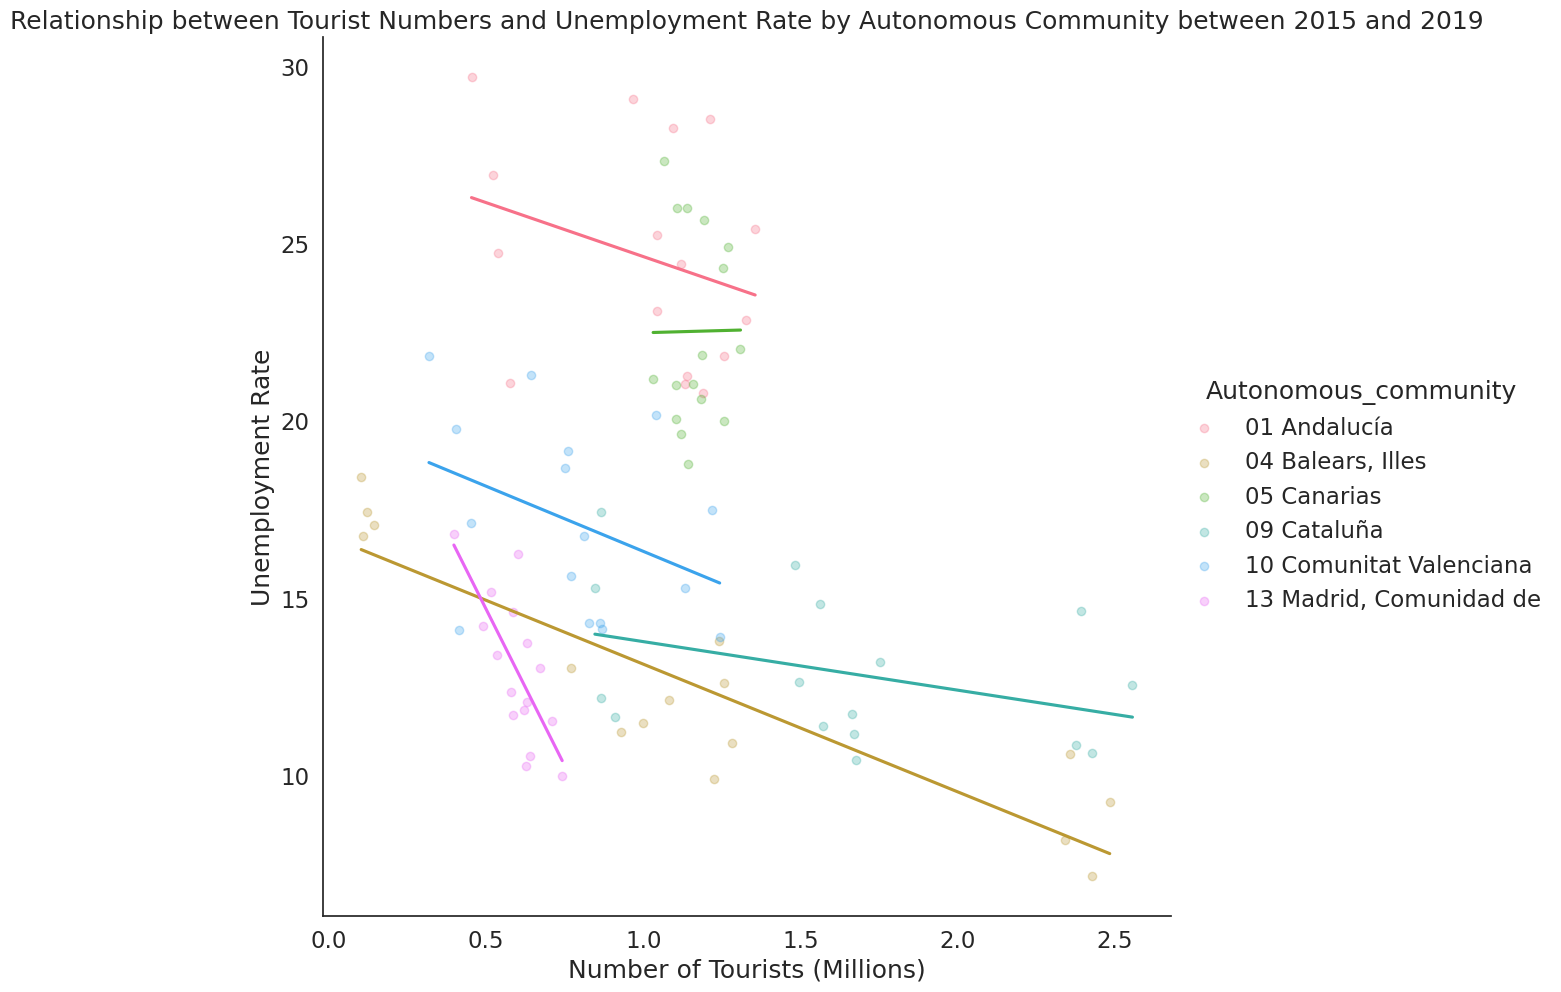

In [15]:
sns.lmplot(data=filtered_df_top_six,
           x='Monthly_number_of_tourists_millions',
           y='Unemployment_rate',
           ci=None,
           hue='Autonomous_community',
           height=10,
           legend=True,
           palette='husl',
           scatter_kws={'alpha':.3})

# Add labels and title
plt.xlabel('Number of Tourists (Millions)')
plt.ylabel('Unemployment Rate')
plt.title('Relationship between Tourist Numbers and Unemployment Rate by Autonomous Community between 2015 and 2019')

plt.show()

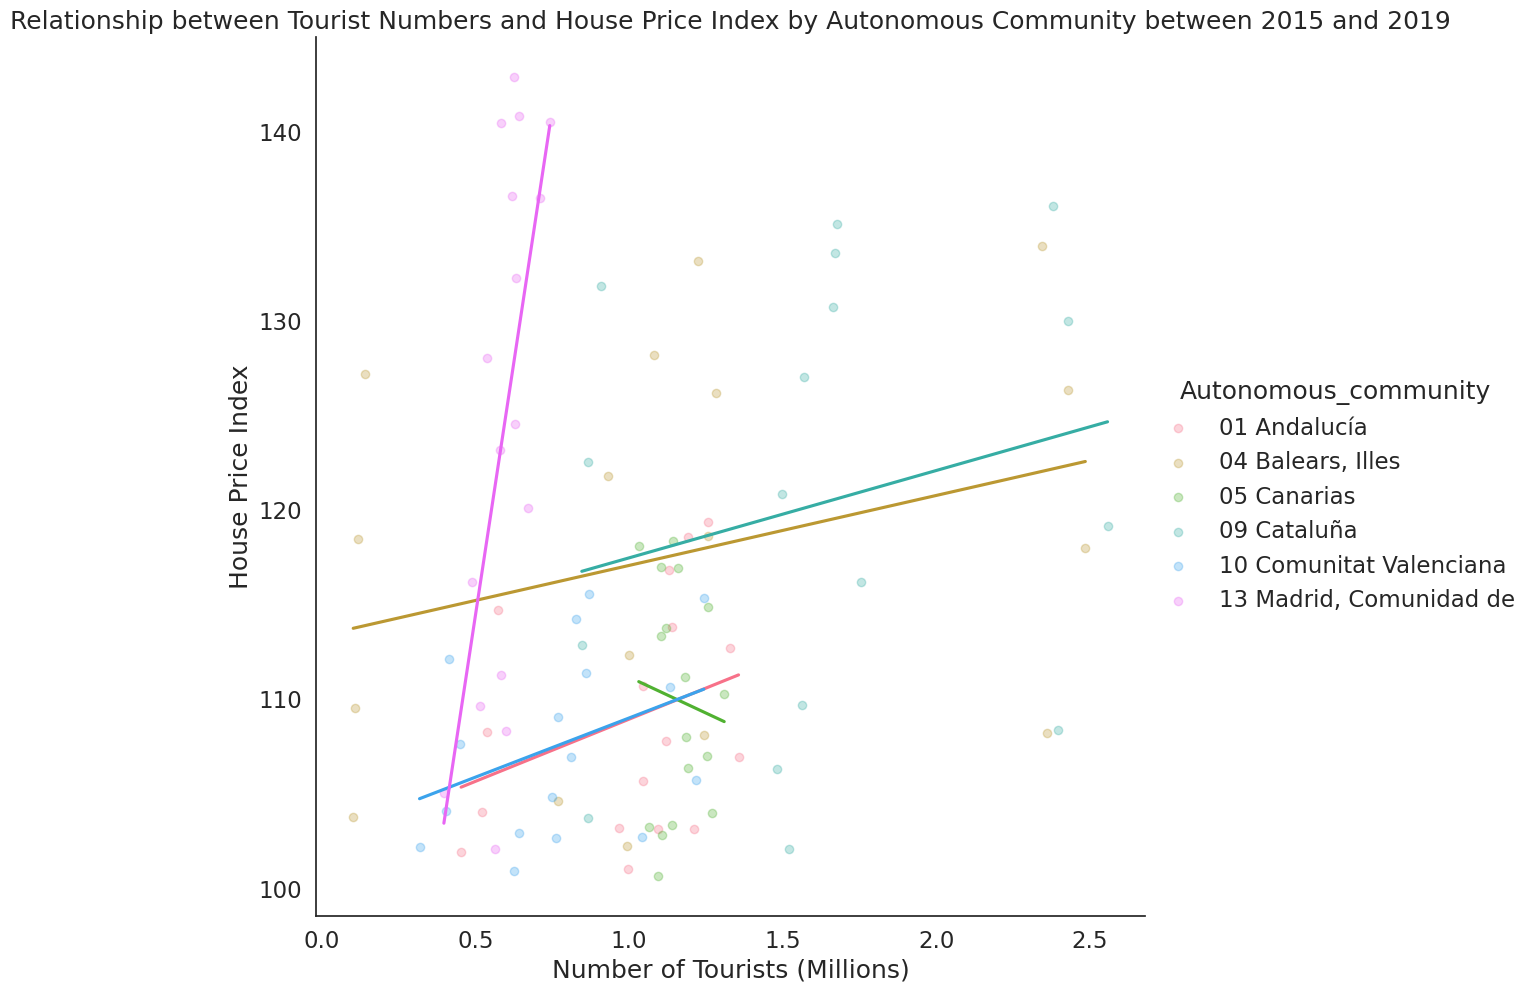

In [16]:
sns.lmplot(data=filtered_df_top_six,
           x='Monthly_number_of_tourists_millions',
           y='HPI',
           ci=None,
           hue='Autonomous_community',
           height=10,
           legend=True,
           palette='husl',
           scatter_kws={'alpha':.3})

# Add labels and title
plt.xlabel('Number of Tourists (Millions)')
plt.ylabel('House Price Index')
plt.title('Relationship between Tourist Numbers and House Price Index by Autonomous Community between 2015 and 2019')

plt.show()

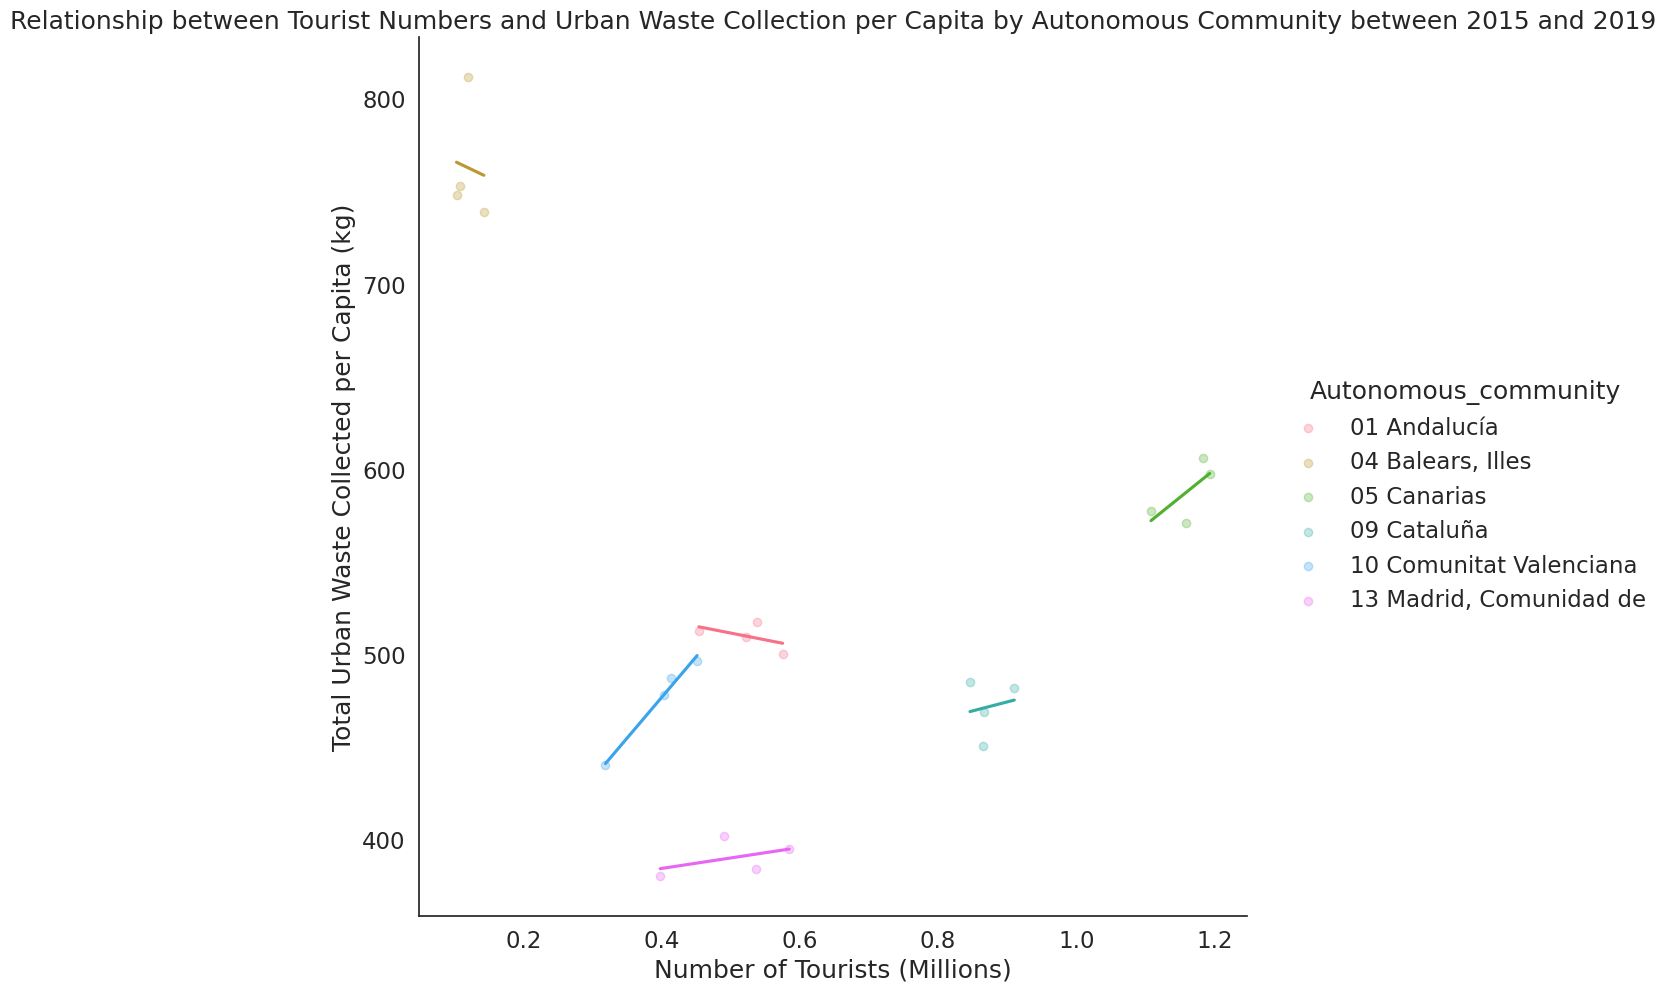

In [17]:
sns.lmplot(data=filtered_df_top_six,
           x='Monthly_number_of_tourists_millions',
           y='total_waste_capita',
           ci=None,
           hue='Autonomous_community',
           height=10,
           legend=True,
           palette='husl',
           scatter_kws={'alpha':.3})

# Add labels and title
plt.xlabel('Number of Tourists (Millions)')
plt.ylabel('Total Urban Waste Collected per Capita (kg)')
plt.title('Relationship between Tourist Numbers and Urban Waste Collection per Capita by Autonomous Community between 2015 and 2019')

plt.show()

#only yearly data for waste collection so not enough data points

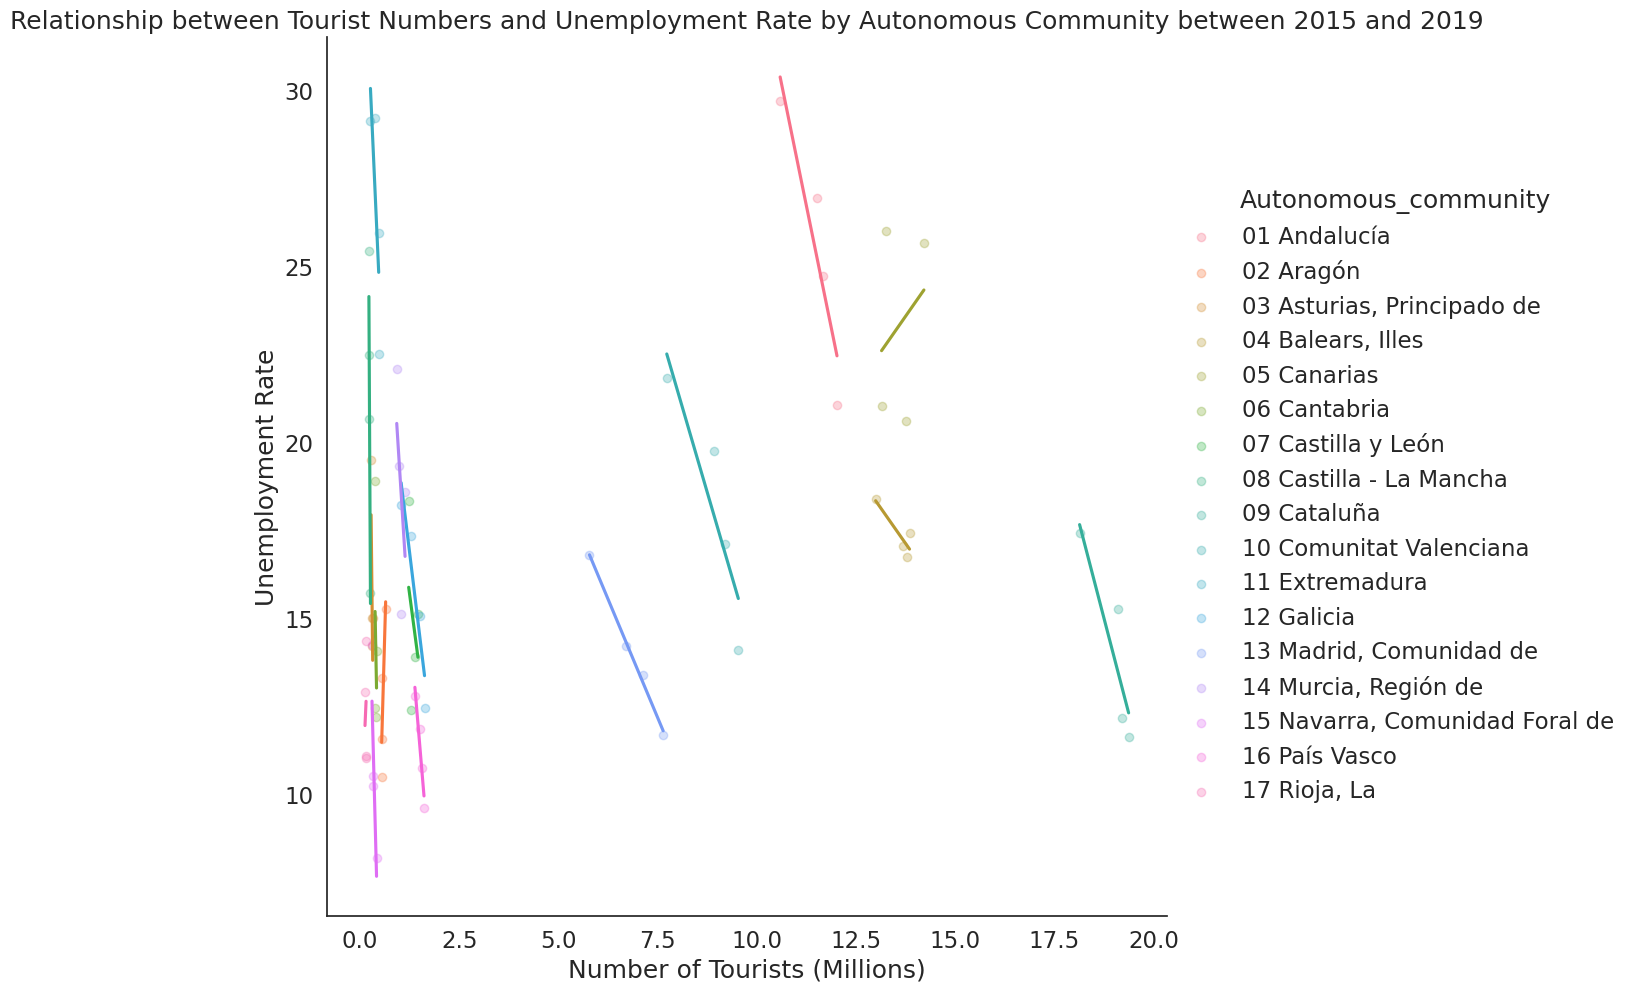

In [19]:
sns.lmplot(data=filtered_df_only_AC,
           x='Yearly_tourist_numbers_millions',
           y='Unemployment_rate',
           ci=None,
           hue='Autonomous_community',
           height=10,
           legend=True,
           palette='husl',
           scatter_kws={'alpha':.3})

# Add labels and title
plt.xlabel('Number of Tourists (Millions)')
plt.ylabel('Unemployment Rate')
plt.title('Relationship between Tourist Numbers and Unemployment Rate by Autonomous Community between 2015 and 2019')

plt.show()

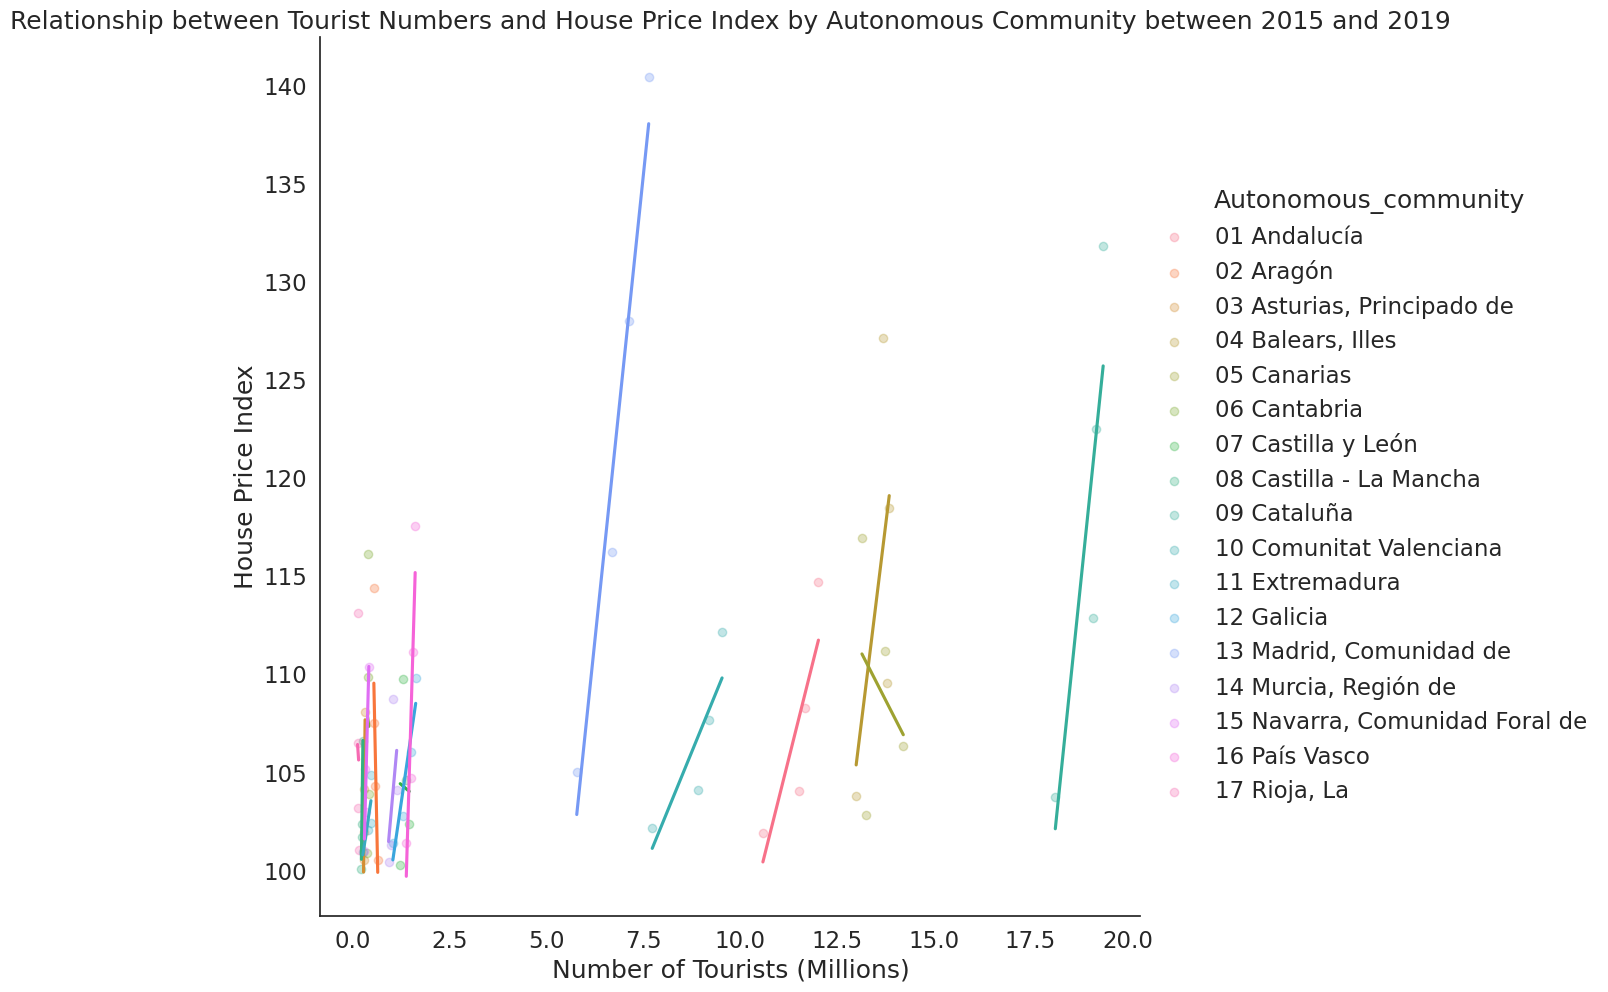

In [20]:
sns.lmplot(data=filtered_df_only_AC,
           x='Yearly_tourist_numbers_millions',
           y='HPI',
           ci=None,
           hue='Autonomous_community',
           height=10,
           legend=True,
           palette='husl',
           scatter_kws={'alpha':.3})

# Add labels and title
plt.xlabel('Number of Tourists (Millions)')
plt.ylabel('House Price Index')
plt.title('Relationship between Tourist Numbers and House Price Index by Autonomous Community between 2015 and 2019')

plt.show()

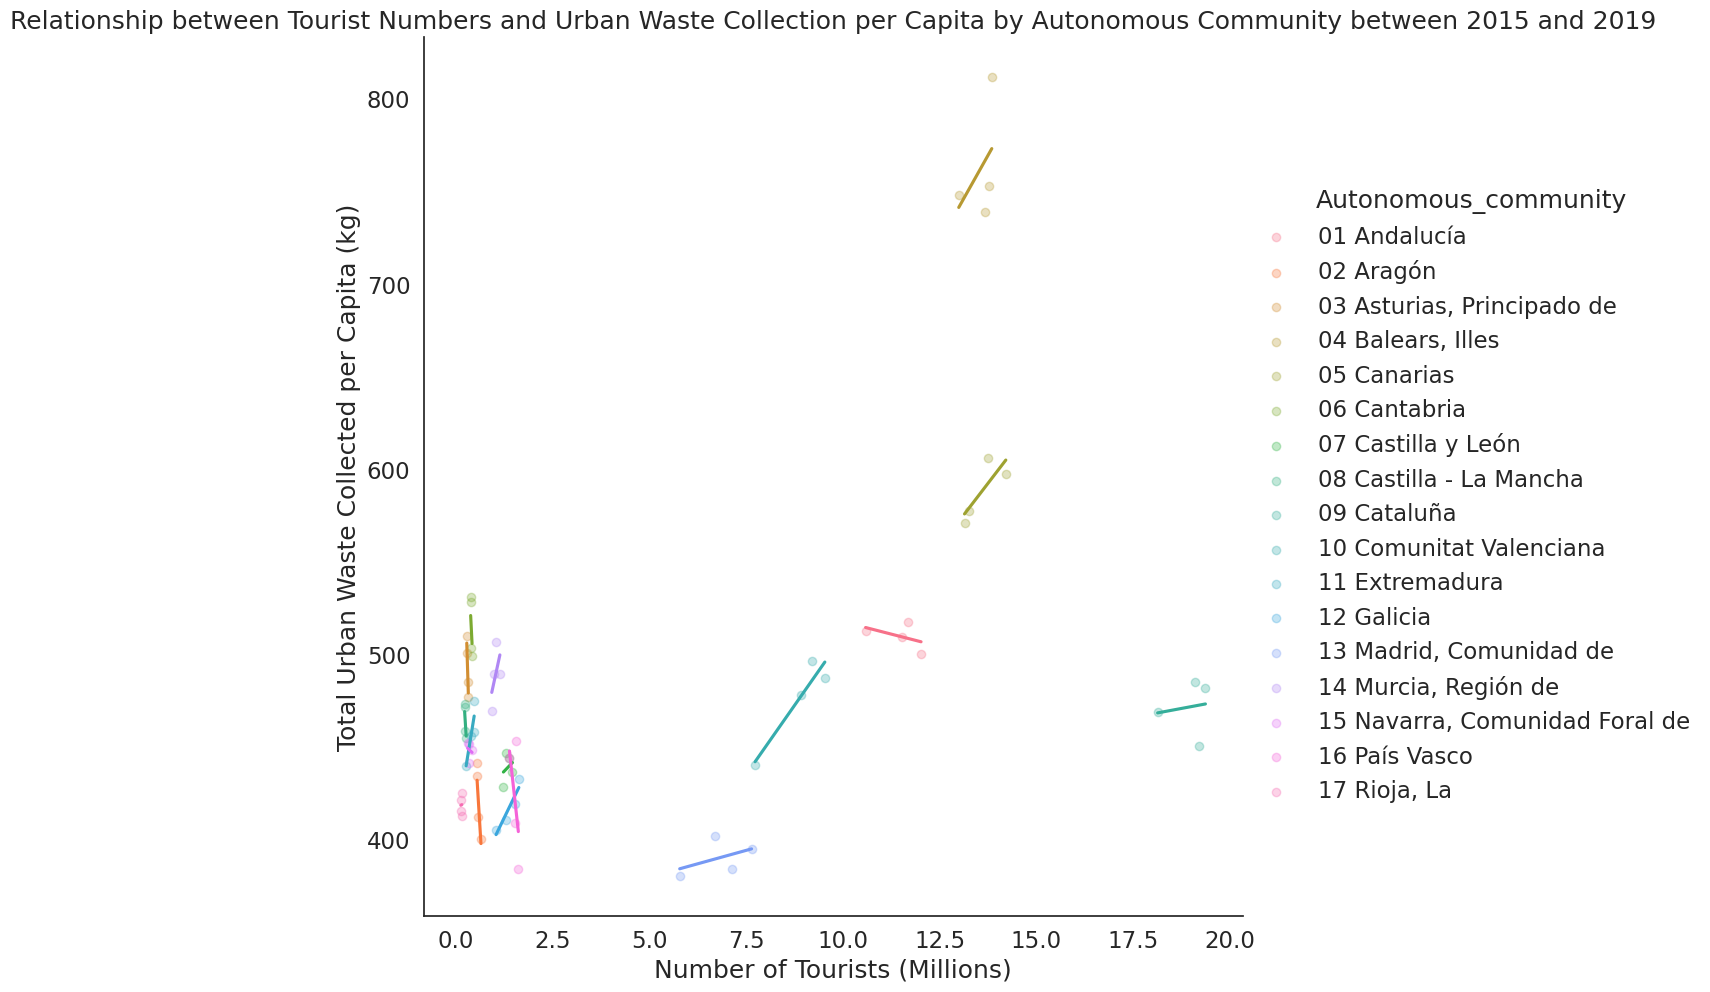

In [21]:
sns.lmplot(data=filtered_df_only_AC,
           x='Yearly_tourist_numbers_millions',
           y='total_waste_capita',
           ci=None,
           hue='Autonomous_community',
           height=10,
           legend=True,
           palette='husl',
           scatter_kws={'alpha':.3})

# Add labels and title
plt.xlabel('Number of Tourists (Millions)')
plt.ylabel('Total Urban Waste Collected per Capita (kg)')
plt.title('Relationship between Tourist Numbers and Urban Waste Collection per Capita by Autonomous Community between 2015 and 2019')

plt.show()

#only yearly data for waste collection so not enough data points

Text(69.75, 0.5, 'Unemployment rate')

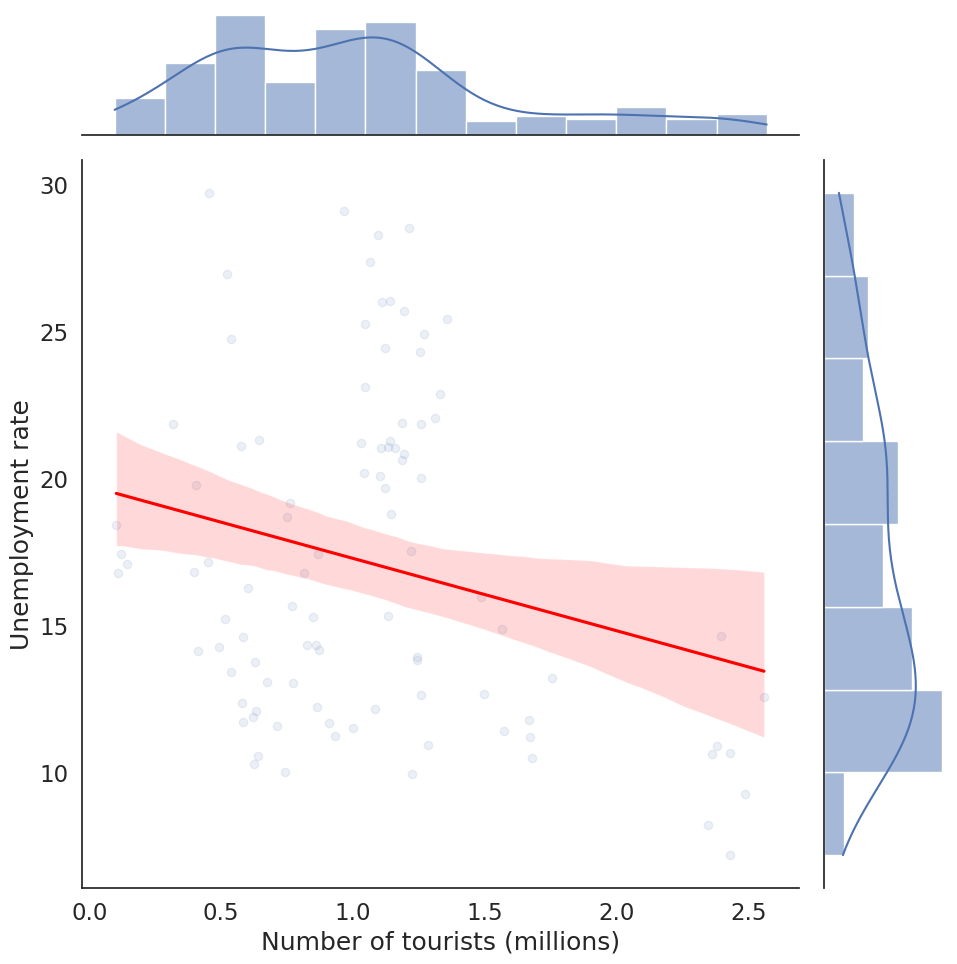

In [22]:
#testing homoscedacticity
sns.jointplot(data=filtered_df_top_six, # plot a scatterplot with a regression line and two histograms
                x='Monthly_number_of_tourists_millions', # set the x axis to be the years of schooling
                y='Unemployment_rate', # set the y axis to be the hourly wage
                kind="reg",  # set the kind of plot to be a regression plot
                scatter_kws=dict(alpha=0.1), # set the transparency of the points to be 0.1 (10%)
                line_kws=dict(color='red'), # set the color of the regression line to red
                height=10) # set the height of the plot to be 10 inches

plt.xlabel('Number of tourists (millions)') # add a label to the x axis
plt.ylabel('Unemployment rate') # add a label to the y axis

Text(69.75, 0.5, 'House Price Index')

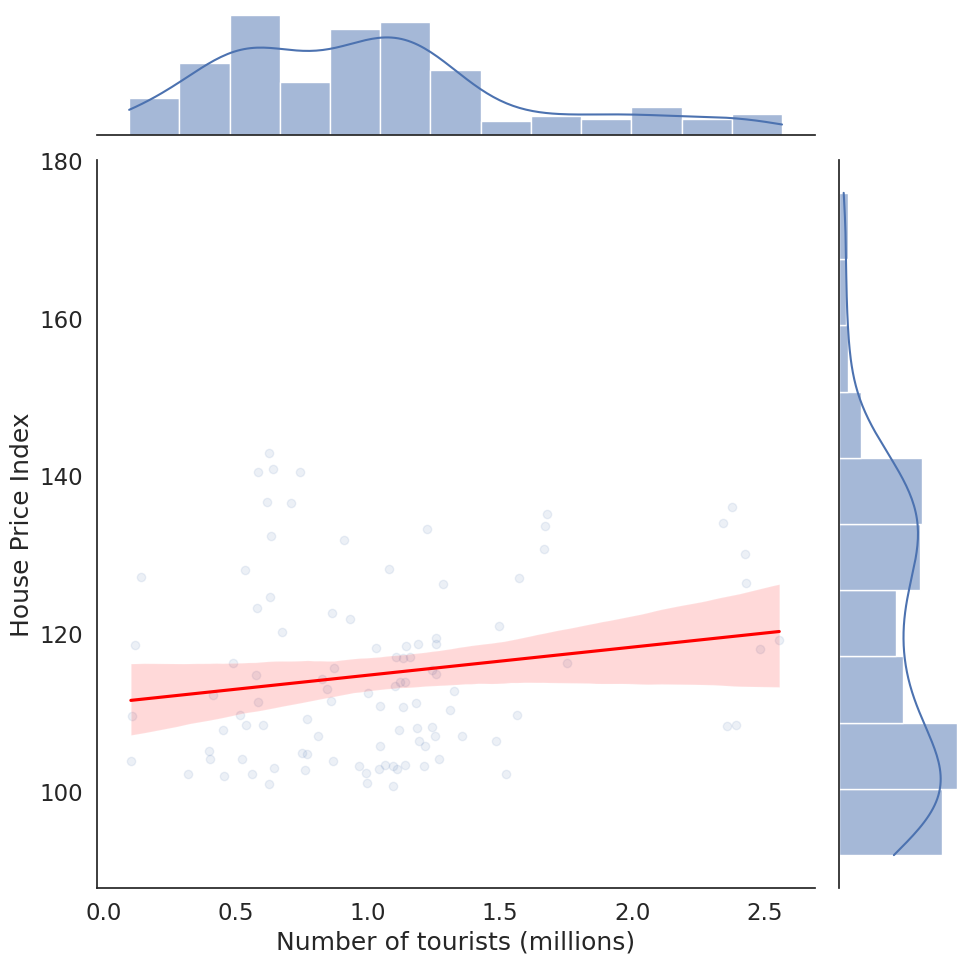

In [23]:
#testing homoscedacticity
sns.jointplot(data=filtered_df_top_six, # plot a scatterplot with a regression line and two histograms
                x='Monthly_number_of_tourists_millions', # set the x axis to be the years of schooling
                y='HPI', # set the y axis to be the hourly wage
                kind="reg",  # set the kind of plot to be a regression plot
                scatter_kws=dict(alpha=0.1), # set the transparency of the points to be 0.1 (10%)
                line_kws=dict(color='red'), # set the color of the regression line to red
                height=10) # set the height of the plot to be 10 inches

plt.xlabel('Number of tourists (millions)') # add a label to the x axis
plt.ylabel('House Price Index') # add a label to the y axis

Text(69.75, 0.5, 'Total urban waste collection per capita (kg)')

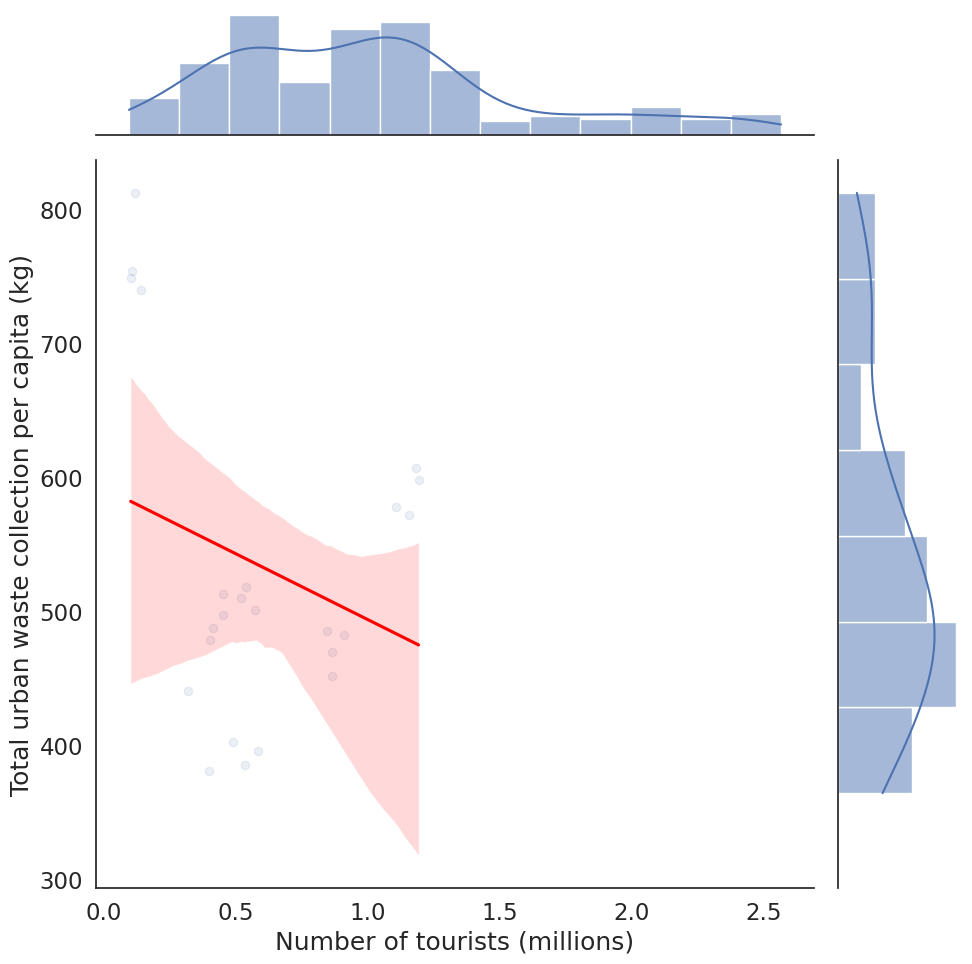

In [24]:
#testing homoscedacticity
sns.jointplot(data=filtered_df_top_six, # plot a scatterplot with a regression line and two histograms
                x='Monthly_number_of_tourists_millions', # set the x axis to be the years of schooling
                y='total_waste_capita', # set the y axis to be the hourly wage
                kind="reg",  # set the kind of plot to be a regression plot
                scatter_kws=dict(alpha=0.1), # set the transparency of the points to be 0.1 (10%)
                line_kws=dict(color='red'), # set the color of the regression line to red
                height=10) # set the height of the plot to be 10 inches

plt.xlabel('Number of tourists (millions)') # add a label to the x axis
plt.ylabel('Total urban waste collection per capita (kg)') # add a label to the y axis

In [ ]:
!pip install linearmodels
from linearmodels import PanelOLS
from linearmodels import RandomEffects
import statsmodels.formula.api as smf
from linearmodels.panel import compare

df_c=df_c.set_index(['county_fips','year']) # set the index to the county fips code and the year
panel = PanelOLS.from_formula('r_votes ~ 1  + population + unemployment  + EntityEffects',df_c).fit() # run a fixed effects model
print(compare({'Fixed Effects': panel,}, stars=True)) # print the model formatted as a regression table